In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2

import os 

In [2]:
save_path = ('figures/1a5')
if not os.path.isdir(save_path):
    os.makedirs(save_path)

In [3]:
# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

In [4]:
NUM_CLASSES = 3

l_r = 0.01
epochs = 1000
batch_size = 32
num_neurons = 10
seed = 10

In [5]:
np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
histories = {}

In [7]:
train_input = np.genfromtxt('ctg_data_cleaned.csv', delimiter= ',')

X, Y = train_input[1:, :21], train_input[1:,-1].astype(int)

X = scale(X, np.min(X, axis=0), np.max(X, axis=0))
Y = Y-1

no_data = len(X)

idx = np.arange(no_data)
np.random.shuffle(idx)
trainX, trainY= X[idx],Y[idx]

In [8]:
testX = trainX[-638:]
testY = trainY[-638:]

trainX = trainX[:1488]
trainY = trainY[:1488]

no_data = len(testX)

In [9]:
# create the model
starter_model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(10**-6)),
        keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(10**-6)),
        keras.layers.Dense(NUM_CLASSES, activation='softmax')])

In [10]:
starter_model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# train the model
histories['starter'] =starter_model.fit(trainX, trainY,
                                        epochs=epochs,
                                        verbose = 2,
                                        batch_size=batch_size,
                                        validation_data=(testX,testY))

Epoch 1/1000
47/47 - 0s - loss: 1.0436 - accuracy: 0.4765 - val_loss: 0.9112 - val_accuracy: 0.7947
Epoch 2/1000
47/47 - 0s - loss: 0.8480 - accuracy: 0.7809 - val_loss: 0.7788 - val_accuracy: 0.7853
Epoch 3/1000
47/47 - 0s - loss: 0.7481 - accuracy: 0.7755 - val_loss: 0.7046 - val_accuracy: 0.7853
Epoch 4/1000
47/47 - 0s - loss: 0.6979 - accuracy: 0.7755 - val_loss: 0.6710 - val_accuracy: 0.7853
Epoch 5/1000
47/47 - 0s - loss: 0.6764 - accuracy: 0.7755 - val_loss: 0.6566 - val_accuracy: 0.7853
Epoch 6/1000
47/47 - 0s - loss: 0.6664 - accuracy: 0.7755 - val_loss: 0.6477 - val_accuracy: 0.7853
Epoch 7/1000
47/47 - 0s - loss: 0.6588 - accuracy: 0.7755 - val_loss: 0.6401 - val_accuracy: 0.7853
Epoch 8/1000
47/47 - 0s - loss: 0.6523 - accuracy: 0.7755 - val_loss: 0.6335 - val_accuracy: 0.7853
Epoch 9/1000
47/47 - 0s - loss: 0.6463 - accuracy: 0.7755 - val_loss: 0.6273 - val_accuracy: 0.7853
Epoch 10/1000
47/47 - 0s - loss: 0.6406 - accuracy: 0.7755 - val_loss: 0.6213 - val_accuracy: 0.7853

Epoch 83/1000
47/47 - 0s - loss: 0.2855 - accuracy: 0.8716 - val_loss: 0.2650 - val_accuracy: 0.8950
Epoch 84/1000
47/47 - 0s - loss: 0.2847 - accuracy: 0.8743 - val_loss: 0.2648 - val_accuracy: 0.8903
Epoch 85/1000
47/47 - 0s - loss: 0.2822 - accuracy: 0.8757 - val_loss: 0.2632 - val_accuracy: 0.8934
Epoch 86/1000
47/47 - 0s - loss: 0.2819 - accuracy: 0.8763 - val_loss: 0.2618 - val_accuracy: 0.8934
Epoch 87/1000
47/47 - 0s - loss: 0.2810 - accuracy: 0.8743 - val_loss: 0.2657 - val_accuracy: 0.8934
Epoch 88/1000
47/47 - 0s - loss: 0.2795 - accuracy: 0.8737 - val_loss: 0.2598 - val_accuracy: 0.8997
Epoch 89/1000
47/47 - 0s - loss: 0.2794 - accuracy: 0.8750 - val_loss: 0.2598 - val_accuracy: 0.8966
Epoch 90/1000
47/47 - 0s - loss: 0.2779 - accuracy: 0.8797 - val_loss: 0.2629 - val_accuracy: 0.8918
Epoch 91/1000
47/47 - 0s - loss: 0.2760 - accuracy: 0.8757 - val_loss: 0.2611 - val_accuracy: 0.8934
Epoch 92/1000
47/47 - 0s - loss: 0.2765 - accuracy: 0.8743 - val_loss: 0.2610 - val_accurac

Epoch 164/1000
47/47 - 0s - loss: 0.2422 - accuracy: 0.8945 - val_loss: 0.2354 - val_accuracy: 0.9075
Epoch 165/1000
47/47 - 0s - loss: 0.2415 - accuracy: 0.8978 - val_loss: 0.2351 - val_accuracy: 0.9060
Epoch 166/1000
47/47 - 0s - loss: 0.2415 - accuracy: 0.8918 - val_loss: 0.2470 - val_accuracy: 0.8950
Epoch 167/1000
47/47 - 0s - loss: 0.2422 - accuracy: 0.8965 - val_loss: 0.2355 - val_accuracy: 0.9075
Epoch 168/1000
47/47 - 0s - loss: 0.2403 - accuracy: 0.8938 - val_loss: 0.2360 - val_accuracy: 0.9091
Epoch 169/1000
47/47 - 0s - loss: 0.2412 - accuracy: 0.8938 - val_loss: 0.2377 - val_accuracy: 0.9013
Epoch 170/1000
47/47 - 0s - loss: 0.2404 - accuracy: 0.8918 - val_loss: 0.2366 - val_accuracy: 0.9044
Epoch 171/1000
47/47 - 0s - loss: 0.2398 - accuracy: 0.8911 - val_loss: 0.2359 - val_accuracy: 0.9028
Epoch 172/1000
47/47 - 0s - loss: 0.2410 - accuracy: 0.8925 - val_loss: 0.2361 - val_accuracy: 0.9044
Epoch 173/1000
47/47 - 0s - loss: 0.2388 - accuracy: 0.8958 - val_loss: 0.2495 - v

Epoch 245/1000
47/47 - 0s - loss: 0.2294 - accuracy: 0.8985 - val_loss: 0.2272 - val_accuracy: 0.9091
Epoch 246/1000
47/47 - 0s - loss: 0.2293 - accuracy: 0.8992 - val_loss: 0.2324 - val_accuracy: 0.8903
Epoch 247/1000
47/47 - 0s - loss: 0.2297 - accuracy: 0.8999 - val_loss: 0.2269 - val_accuracy: 0.9075
Epoch 248/1000
47/47 - 0s - loss: 0.2300 - accuracy: 0.8978 - val_loss: 0.2271 - val_accuracy: 0.9075
Epoch 249/1000
47/47 - 0s - loss: 0.2274 - accuracy: 0.9019 - val_loss: 0.2286 - val_accuracy: 0.9044
Epoch 250/1000
47/47 - 0s - loss: 0.2277 - accuracy: 0.8958 - val_loss: 0.2267 - val_accuracy: 0.9091
Epoch 251/1000
47/47 - 0s - loss: 0.2284 - accuracy: 0.8992 - val_loss: 0.2270 - val_accuracy: 0.9075
Epoch 252/1000
47/47 - 0s - loss: 0.2288 - accuracy: 0.8978 - val_loss: 0.2338 - val_accuracy: 0.9044
Epoch 253/1000
47/47 - 0s - loss: 0.2275 - accuracy: 0.9005 - val_loss: 0.2279 - val_accuracy: 0.9044
Epoch 254/1000
47/47 - 0s - loss: 0.2273 - accuracy: 0.9039 - val_loss: 0.2335 - v

Epoch 326/1000
47/47 - 0s - loss: 0.2215 - accuracy: 0.9052 - val_loss: 0.2226 - val_accuracy: 0.9060
Epoch 327/1000
47/47 - 0s - loss: 0.2226 - accuracy: 0.8985 - val_loss: 0.2295 - val_accuracy: 0.8934
Epoch 328/1000
47/47 - 0s - loss: 0.2222 - accuracy: 0.8999 - val_loss: 0.2237 - val_accuracy: 0.9028
Epoch 329/1000
47/47 - 0s - loss: 0.2206 - accuracy: 0.8999 - val_loss: 0.2219 - val_accuracy: 0.9060
Epoch 330/1000
47/47 - 0s - loss: 0.2217 - accuracy: 0.9026 - val_loss: 0.2207 - val_accuracy: 0.9107
Epoch 331/1000
47/47 - 0s - loss: 0.2220 - accuracy: 0.9073 - val_loss: 0.2266 - val_accuracy: 0.9028
Epoch 332/1000
47/47 - 0s - loss: 0.2207 - accuracy: 0.9039 - val_loss: 0.2265 - val_accuracy: 0.9013
Epoch 333/1000
47/47 - 0s - loss: 0.2225 - accuracy: 0.9026 - val_loss: 0.2259 - val_accuracy: 0.9013
Epoch 334/1000
47/47 - 0s - loss: 0.2194 - accuracy: 0.9059 - val_loss: 0.2254 - val_accuracy: 0.8934
Epoch 335/1000
47/47 - 0s - loss: 0.2207 - accuracy: 0.9039 - val_loss: 0.2242 - v

Epoch 407/1000
47/47 - 0s - loss: 0.2160 - accuracy: 0.9073 - val_loss: 0.2172 - val_accuracy: 0.9060
Epoch 408/1000
47/47 - 0s - loss: 0.2147 - accuracy: 0.9086 - val_loss: 0.2216 - val_accuracy: 0.9044
Epoch 409/1000
47/47 - 0s - loss: 0.2177 - accuracy: 0.9059 - val_loss: 0.2184 - val_accuracy: 0.9060
Epoch 410/1000
47/47 - 0s - loss: 0.2141 - accuracy: 0.9039 - val_loss: 0.2164 - val_accuracy: 0.9075
Epoch 411/1000
47/47 - 0s - loss: 0.2160 - accuracy: 0.9059 - val_loss: 0.2167 - val_accuracy: 0.9060
Epoch 412/1000
47/47 - 0s - loss: 0.2147 - accuracy: 0.9086 - val_loss: 0.2317 - val_accuracy: 0.8918
Epoch 413/1000
47/47 - 0s - loss: 0.2159 - accuracy: 0.9005 - val_loss: 0.2189 - val_accuracy: 0.9060
Epoch 414/1000
47/47 - 0s - loss: 0.2152 - accuracy: 0.9086 - val_loss: 0.2198 - val_accuracy: 0.9091
Epoch 415/1000
47/47 - 0s - loss: 0.2141 - accuracy: 0.9019 - val_loss: 0.2332 - val_accuracy: 0.8903
Epoch 416/1000
47/47 - 0s - loss: 0.2155 - accuracy: 0.9079 - val_loss: 0.2182 - v

Epoch 488/1000
47/47 - 0s - loss: 0.2119 - accuracy: 0.9093 - val_loss: 0.2122 - val_accuracy: 0.9122
Epoch 489/1000
47/47 - 0s - loss: 0.2117 - accuracy: 0.9086 - val_loss: 0.2178 - val_accuracy: 0.9060
Epoch 490/1000
47/47 - 0s - loss: 0.2103 - accuracy: 0.9086 - val_loss: 0.2234 - val_accuracy: 0.8950
Epoch 491/1000
47/47 - 0s - loss: 0.2117 - accuracy: 0.9086 - val_loss: 0.2121 - val_accuracy: 0.9060
Epoch 492/1000
47/47 - 0s - loss: 0.2106 - accuracy: 0.9066 - val_loss: 0.2131 - val_accuracy: 0.9091
Epoch 493/1000
47/47 - 0s - loss: 0.2110 - accuracy: 0.9073 - val_loss: 0.2164 - val_accuracy: 0.9044
Epoch 494/1000
47/47 - 0s - loss: 0.2105 - accuracy: 0.9046 - val_loss: 0.2135 - val_accuracy: 0.9075
Epoch 495/1000
47/47 - 0s - loss: 0.2090 - accuracy: 0.9099 - val_loss: 0.2125 - val_accuracy: 0.9122
Epoch 496/1000
47/47 - 0s - loss: 0.2114 - accuracy: 0.9093 - val_loss: 0.2110 - val_accuracy: 0.9107
Epoch 497/1000
47/47 - 0s - loss: 0.2111 - accuracy: 0.9133 - val_loss: 0.2139 - v

Epoch 569/1000
47/47 - 0s - loss: 0.2066 - accuracy: 0.9113 - val_loss: 0.2182 - val_accuracy: 0.8997
Epoch 570/1000
47/47 - 0s - loss: 0.2065 - accuracy: 0.9113 - val_loss: 0.2070 - val_accuracy: 0.9075
Epoch 571/1000
47/47 - 0s - loss: 0.2050 - accuracy: 0.9126 - val_loss: 0.2138 - val_accuracy: 0.9075
Epoch 572/1000
47/47 - 0s - loss: 0.2052 - accuracy: 0.9099 - val_loss: 0.2183 - val_accuracy: 0.8997
Epoch 573/1000
47/47 - 0s - loss: 0.2057 - accuracy: 0.9113 - val_loss: 0.2106 - val_accuracy: 0.9122
Epoch 574/1000
47/47 - 0s - loss: 0.2047 - accuracy: 0.9113 - val_loss: 0.2063 - val_accuracy: 0.9154
Epoch 575/1000
47/47 - 0s - loss: 0.2054 - accuracy: 0.9140 - val_loss: 0.2067 - val_accuracy: 0.9107
Epoch 576/1000
47/47 - 0s - loss: 0.2041 - accuracy: 0.9079 - val_loss: 0.2078 - val_accuracy: 0.9091
Epoch 577/1000
47/47 - 0s - loss: 0.2055 - accuracy: 0.9113 - val_loss: 0.2070 - val_accuracy: 0.9091
Epoch 578/1000
47/47 - 0s - loss: 0.2053 - accuracy: 0.9093 - val_loss: 0.2079 - v

Epoch 650/1000
47/47 - 0s - loss: 0.2015 - accuracy: 0.9126 - val_loss: 0.2033 - val_accuracy: 0.9091
Epoch 651/1000
47/47 - 0s - loss: 0.1989 - accuracy: 0.9153 - val_loss: 0.2022 - val_accuracy: 0.9091
Epoch 652/1000
47/47 - 0s - loss: 0.1984 - accuracy: 0.9140 - val_loss: 0.2068 - val_accuracy: 0.9091
Epoch 653/1000
47/47 - 0s - loss: 0.2005 - accuracy: 0.9147 - val_loss: 0.2003 - val_accuracy: 0.9154
Epoch 654/1000
47/47 - 0s - loss: 0.2010 - accuracy: 0.9147 - val_loss: 0.2075 - val_accuracy: 0.9013
Epoch 655/1000
47/47 - 0s - loss: 0.1991 - accuracy: 0.9173 - val_loss: 0.2042 - val_accuracy: 0.9075
Epoch 656/1000
47/47 - 0s - loss: 0.2005 - accuracy: 0.9160 - val_loss: 0.2013 - val_accuracy: 0.9138
Epoch 657/1000
47/47 - 0s - loss: 0.2004 - accuracy: 0.9153 - val_loss: 0.2009 - val_accuracy: 0.9154
Epoch 658/1000
47/47 - 0s - loss: 0.1998 - accuracy: 0.9153 - val_loss: 0.2060 - val_accuracy: 0.9107
Epoch 659/1000
47/47 - 0s - loss: 0.1989 - accuracy: 0.9140 - val_loss: 0.2034 - v

Epoch 731/1000
47/47 - 0s - loss: 0.1972 - accuracy: 0.9160 - val_loss: 0.1981 - val_accuracy: 0.9091
Epoch 732/1000
47/47 - 0s - loss: 0.1937 - accuracy: 0.9200 - val_loss: 0.1966 - val_accuracy: 0.9154
Epoch 733/1000
47/47 - 0s - loss: 0.1960 - accuracy: 0.9160 - val_loss: 0.1975 - val_accuracy: 0.9154
Epoch 734/1000
47/47 - 0s - loss: 0.1962 - accuracy: 0.9173 - val_loss: 0.2231 - val_accuracy: 0.8966
Epoch 735/1000
47/47 - 0s - loss: 0.1971 - accuracy: 0.9167 - val_loss: 0.1959 - val_accuracy: 0.9107
Epoch 736/1000
47/47 - 0s - loss: 0.1952 - accuracy: 0.9200 - val_loss: 0.1961 - val_accuracy: 0.9154
Epoch 737/1000
47/47 - 0s - loss: 0.1943 - accuracy: 0.9167 - val_loss: 0.2054 - val_accuracy: 0.9013
Epoch 738/1000
47/47 - 0s - loss: 0.1942 - accuracy: 0.9140 - val_loss: 0.2127 - val_accuracy: 0.8981
Epoch 739/1000
47/47 - 0s - loss: 0.1955 - accuracy: 0.9220 - val_loss: 0.1964 - val_accuracy: 0.9091
Epoch 740/1000
47/47 - 0s - loss: 0.1932 - accuracy: 0.9133 - val_loss: 0.2027 - v

Epoch 812/1000
47/47 - 0s - loss: 0.1901 - accuracy: 0.9153 - val_loss: 0.1925 - val_accuracy: 0.9122
Epoch 813/1000
47/47 - 0s - loss: 0.1901 - accuracy: 0.9187 - val_loss: 0.1938 - val_accuracy: 0.9138
Epoch 814/1000
47/47 - 0s - loss: 0.1928 - accuracy: 0.9194 - val_loss: 0.1941 - val_accuracy: 0.9138
Epoch 815/1000
47/47 - 0s - loss: 0.1911 - accuracy: 0.9187 - val_loss: 0.1984 - val_accuracy: 0.9075
Epoch 816/1000
47/47 - 0s - loss: 0.1905 - accuracy: 0.9214 - val_loss: 0.2037 - val_accuracy: 0.9060
Epoch 817/1000
47/47 - 0s - loss: 0.1894 - accuracy: 0.9200 - val_loss: 0.1920 - val_accuracy: 0.9154
Epoch 818/1000
47/47 - 0s - loss: 0.1902 - accuracy: 0.9207 - val_loss: 0.1924 - val_accuracy: 0.9138
Epoch 819/1000
47/47 - 0s - loss: 0.1874 - accuracy: 0.9234 - val_loss: 0.2219 - val_accuracy: 0.8966
Epoch 820/1000
47/47 - 0s - loss: 0.1891 - accuracy: 0.9214 - val_loss: 0.1921 - val_accuracy: 0.9154
Epoch 821/1000
47/47 - 0s - loss: 0.1887 - accuracy: 0.9220 - val_loss: 0.1923 - v

Epoch 893/1000
47/47 - 0s - loss: 0.1842 - accuracy: 0.9220 - val_loss: 0.1914 - val_accuracy: 0.9107
Epoch 894/1000
47/47 - 0s - loss: 0.1851 - accuracy: 0.9220 - val_loss: 0.2028 - val_accuracy: 0.9013
Epoch 895/1000
47/47 - 0s - loss: 0.1848 - accuracy: 0.9200 - val_loss: 0.1960 - val_accuracy: 0.9169
Epoch 896/1000
47/47 - 0s - loss: 0.1839 - accuracy: 0.9241 - val_loss: 0.1948 - val_accuracy: 0.9122
Epoch 897/1000
47/47 - 0s - loss: 0.1847 - accuracy: 0.9234 - val_loss: 0.1911 - val_accuracy: 0.9169
Epoch 898/1000
47/47 - 0s - loss: 0.1831 - accuracy: 0.9214 - val_loss: 0.1932 - val_accuracy: 0.9216
Epoch 899/1000
47/47 - 0s - loss: 0.1835 - accuracy: 0.9214 - val_loss: 0.1973 - val_accuracy: 0.9091
Epoch 900/1000
47/47 - 0s - loss: 0.1825 - accuracy: 0.9180 - val_loss: 0.2015 - val_accuracy: 0.9091
Epoch 901/1000
47/47 - 0s - loss: 0.1821 - accuracy: 0.9173 - val_loss: 0.1904 - val_accuracy: 0.9169
Epoch 902/1000
47/47 - 0s - loss: 0.1828 - accuracy: 0.9234 - val_loss: 0.2243 - v

Epoch 974/1000
47/47 - 0s - loss: 0.1794 - accuracy: 0.9234 - val_loss: 0.1938 - val_accuracy: 0.9138
Epoch 975/1000
47/47 - 0s - loss: 0.1786 - accuracy: 0.9220 - val_loss: 0.1896 - val_accuracy: 0.9201
Epoch 976/1000
47/47 - 0s - loss: 0.1785 - accuracy: 0.9207 - val_loss: 0.1889 - val_accuracy: 0.9169
Epoch 977/1000
47/47 - 0s - loss: 0.1786 - accuracy: 0.9227 - val_loss: 0.1952 - val_accuracy: 0.9138
Epoch 978/1000
47/47 - 0s - loss: 0.1799 - accuracy: 0.9241 - val_loss: 0.1898 - val_accuracy: 0.9185
Epoch 979/1000
47/47 - 0s - loss: 0.1803 - accuracy: 0.9147 - val_loss: 0.1895 - val_accuracy: 0.9201
Epoch 980/1000
47/47 - 0s - loss: 0.1786 - accuracy: 0.9241 - val_loss: 0.1896 - val_accuracy: 0.9201
Epoch 981/1000
47/47 - 0s - loss: 0.1787 - accuracy: 0.9227 - val_loss: 0.1943 - val_accuracy: 0.9169
Epoch 982/1000
47/47 - 0s - loss: 0.1792 - accuracy: 0.9220 - val_loss: 0.2255 - val_accuracy: 0.8918
Epoch 983/1000
47/47 - 0s - loss: 0.1804 - accuracy: 0.9247 - val_loss: 0.1911 - v

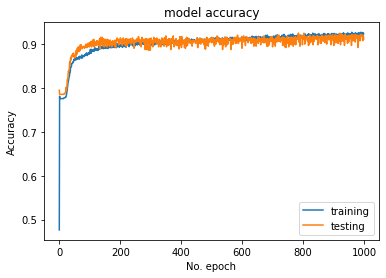

In [12]:
# plot learning curves
plt.plot(histories['starter'].history['accuracy'], label='training')
plt.plot(histories['starter'].history['val_accuracy'], label='testing')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.title("model accuracy")
plt.legend(loc="lower right")
plt.savefig('./%s/acc_vs_e.png'%(save_path))
plt.show()

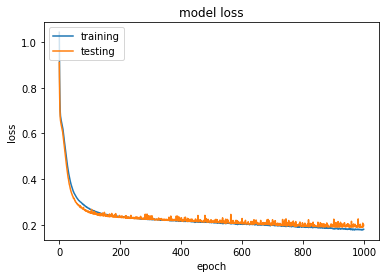

In [13]:
plt.plot(histories['starter'].history['loss'], label='training')
plt.plot(histories['starter'].history['val_loss'], label='testing')    
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("model loss")
plt.legend(loc='upper left')
plt.savefig('./%s/loss_vs_e.png'%(save_path))
plt.show()

In [14]:
print(histories['starter'].history['accuracy'][epochs-1])

0.9233871102333069


In [15]:
print(histories['starter'].history['val_accuracy'][epochs-1])

0.9106582999229431
